# 水蒸気ライダーデータの読み込み（複数ファイル）

In [542]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pathlib import Path
import xarray as xr
import os

In [543]:
pd.set_option('display.max_rows', 100)

In [544]:
#--- set parameters---------------------------------------
#time = pd.date_range('202107092200', '202107100000', freq='15T')
time = pd.date_range('202107092300', '202107100100', freq='15T')
#time = pd.date_range('202107091200', '202107101200', freq='15T')
#time = pd.date_range('202107091800', '202107100300', freq='15T')
#time = pd.date_range('202107092345', '202107100000', freq='15T')
lidar = 'Ko'
#lidar = 'Na'
rmiss = np.nan
dt = pd.Timedelta(minutes=15/2.0)
time

DatetimeIndex(['2021-07-09 23:00:00', '2021-07-09 23:15:00',
               '2021-07-09 23:30:00', '2021-07-09 23:45:00',
               '2021-07-10 00:00:00', '2021-07-10 00:15:00',
               '2021-07-10 00:30:00', '2021-07-10 00:45:00',
               '2021-07-10 01:00:00'],
              dtype='datetime64[ns]', freq='15T')

In [545]:
#---read WVL data by pandas------------------------
dlist = []
keys = []
for t in time:
    ymdh  = t.strftime('%Y/%m/%d/%H/')
    ymdhm = t.strftime('%y%m%d%H%M')
    #f = '../data/MRI_VAPOR/2021/07/09/23/Ko2107092345mgd.txt'
    f = '../data/MRI_VAPOR/' + ymdh + lidar + ymdhm + 'mgd.txt'
#    print(f)
    t2 = t + dt
    keys.append(t2)
    
    is_file = os.path.isfile(f)
#    print(is_file)
    if is_file:
        print(f"{f} exists and is a file.")
        df0 = pd.read_table(f, sep='\s+', header=2, index_col=0)
        df0 = df0.replace([-9.990000e+02], rmiss)
        df0
        #t = pd.to_datetime("202107092330") + pd.Timedelta(minutes=dt)
        dlist.append(df0)
    else:
        # 読み込むファイルのうち一番最初のファイルは存在しているに場合のみ対応している。
        df1 = df0.copy()
        df1[:] = rmiss # ファイルが存在しなければ、-999.90を代入する
#        df1[:] = -999.90 # ファイルが存在しなければ、-999.90を代入する
        dlist.append(df1) 
        print(f"{f} does not exiest or is not a file.")
#    print(t2)    

../data/MRI_VAPOR/2021/07/09/23/Ko2107092300mgd.txt does not exiest or is not a file.
../data/MRI_VAPOR/2021/07/09/23/Ko2107092315mgd.txt does not exiest or is not a file.
../data/MRI_VAPOR/2021/07/09/23/Ko2107092330mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/09/23/Ko2107092345mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/10/00/Ko2107100000mgd.txt does not exiest or is not a file.
../data/MRI_VAPOR/2021/07/10/00/Ko2107100015mgd.txt does not exiest or is not a file.
../data/MRI_VAPOR/2021/07/10/00/Ko2107100030mgd.txt does not exiest or is not a file.
../data/MRI_VAPOR/2021/07/10/00/Ko2107100045mgd.txt exists and is a file.
../data/MRI_VAPOR/2021/07/10/01/Ko2107100100mgd.txt exists and is a file.


## pandas dataframe MultiIndexの作成
* 指定した軸の方向にDataFrameを結合するPandasのconcat関数の使い方
  * https://deepage.net/features/pandas-concat.html
    * 「元のデータの判別にラベルをつける」の部分を参考にした

In [546]:
df = pd.concat(dlist, keys=keys, names=["TIME", "LEV"]) # MultiIndexの作成
#    df = pd.concat([df0, df1], keys=[t0, t1], names=["TIME", "LEV"]) # MultiIndexの作成
df

W[g/kg]  dW[g/kg]        R355         dR355  \
TIME                LEV                                                    
2021-07-09 23:07:30 0.19237      NaN       NaN         NaN           NaN   
                    0.26732      NaN       NaN         NaN           NaN   
                    0.34227      NaN       NaN         NaN           NaN   
                    0.41721      NaN       NaN         NaN           NaN   
                    0.49216      NaN       NaN         NaN           NaN   
...                              ...       ...         ...           ...   
2021-07-10 01:07:30 9.22362      NaN       0.0  10000000.0  2.577000e+42   
                    9.37351      NaN       0.0  10000000.0  2.640000e+42   
                    9.52341      NaN       0.0  10000000.0  2.703000e+42   
                    9.67331      NaN       0.0  10000000.0  2.767000e+42   
                    9.82320      NaN       0.0  10000000.0  2.831000e+42   

                              T[K]  RO[gm^-3]   PZ^2_355  Wsonde[g/kg]  \
TIME                LEV                                                  
2021-07-09 23:07:30 0.19237    NaN        NaN        NaN           NaN   
                    0.26732    NaN        NaN        NaN           NaN   
                    0.34227    NaN        NaN        NaN           NaN   
                    0.41721    NaN        NaN        NaN           NaN   
                    0.49216    NaN        NaN        NaN           NaN   
...                            ...        ...        ...           ...   
2021-07-10 01:07:30 9.22362  228.3     0.4545    0.00000           0.0   
                    9.37351  227.3     0.4463  131.80250           0.0   
                    9.52341  226.3     0.4382   45.35048           0.0   
                    9.67331  225.3     0.4303   46.78937           0.0   
                    9.82320  224.4     0.4225    0.00000           0.0   

                             dWsonde[g/kg]  
TIME                LEV                     
2021-07-09 23:07:30 0.19237            NaN  
                    0.26732            NaN  
                    0.34227            NaN  
                    0.41721            NaN  
                    0.49216            NaN  
...                                    ...  
2021-07-10 01:07:30 9.22362            0.0  
                    9.37351            0.0  
                    9.52341            0.0  
                    9.67331            0.0  
                    9.82320            0.0  

[639 rows x 9 columns]

In [547]:
#---解析: uncertainty(a)の算出、及びaを用いて品質管理した水蒸気混合比w2の算出（2つの変数はdfに格納する）
rmiss = np.nan
df = df.replace([-9.990000e+02], rmiss) # 欠損値-999.0をNANに置き換える
w  = df['W[g/kg]']
dw = df['dW[g/kg]']
a = dw/w * 100
df['uncertainty[%]'] = a
a_th = 30.0 # (%)
#rmiss = -999.0
df['W2[g/kg]'] = df['W[g/kg]'].mask(a>a_th, rmiss) # a が30%を超える場合、wにNANを入力しw2としてdfに格納
df
#df['W2[g/kg]'] 

W[g/kg]  dW[g/kg]        R355         dR355  \
TIME                LEV                                                    
2021-07-09 23:07:30 0.19237      NaN       NaN         NaN           NaN   
                    0.26732      NaN       NaN         NaN           NaN   
                    0.34227      NaN       NaN         NaN           NaN   
                    0.41721      NaN       NaN         NaN           NaN   
                    0.49216      NaN       NaN         NaN           NaN   
...                              ...       ...         ...           ...   
2021-07-10 01:07:30 9.22362      NaN       0.0  10000000.0  2.577000e+42   
                    9.37351      NaN       0.0  10000000.0  2.640000e+42   
                    9.52341      NaN       0.0  10000000.0  2.703000e+42   
                    9.67331      NaN       0.0  10000000.0  2.767000e+42   
                    9.82320      NaN       0.0  10000000.0  2.831000e+42   

                              T[K]  RO[gm^-3]   PZ^2_355  Wsonde[g/kg]  \
TIME                LEV                                                  
2021-07-09 23:07:30 0.19237    NaN        NaN        NaN           NaN   
                    0.26732    NaN        NaN        NaN           NaN   
                    0.34227    NaN        NaN        NaN           NaN   
                    0.41721    NaN        NaN        NaN           NaN   
                    0.49216    NaN        NaN        NaN           NaN   
...                            ...        ...        ...           ...   
2021-07-10 01:07:30 9.22362  228.3     0.4545    0.00000           0.0   
                    9.37351  227.3     0.4463  131.80250           0.0   
                    9.52341  226.3     0.4382   45.35048           0.0   
                    9.67331  225.3     0.4303   46.78937           0.0   
                    9.82320  224.4     0.4225    0.00000           0.0   

                             dWsonde[g/kg]  uncertainty[%]  W2[g/kg]  
TIME                LEV                                               
2021-07-09 23:07:30 0.19237            NaN             NaN       NaN  
                    0.26732            NaN             NaN       NaN  
                    0.34227            NaN             NaN       NaN  
                    0.41721            NaN             NaN       NaN  
                    0.49216            NaN             NaN       NaN  
...                                    ...             ...       ...  
2021-07-10 01:07:30 9.22362            0.0             NaN       NaN  
                    9.37351            0.0             NaN       NaN  
                    9.52341            0.0             NaN       NaN  
                    9.67331            0.0             NaN       NaN  
                    9.82320            0.0             NaN       NaN  

[639 rows x 11 columns]

In [548]:
ds = df.to_xarray()
XR = ds.transpose("LEV", "TIME")
#XR

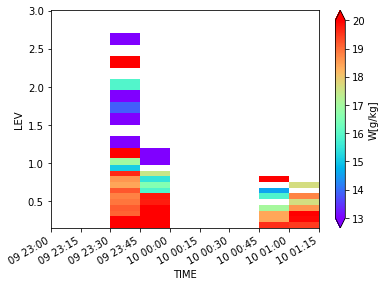

In [549]:
#x['W[g/kg]'].plot()
cmap = 'YlGnBu'
cmap = 'rainbow'
zmin = 0; zmax = 3
vmin = 13; vmax = 20
XR['W[g/kg]'].sel(LEV=slice(zmin, zmax)).plot(vmin=vmin, vmax=vmax, cmap=cmap)
#pw4 = pw1.sel(LON=slice(139.65,139.7)).sel(LAT=slice(35.7,35.75))

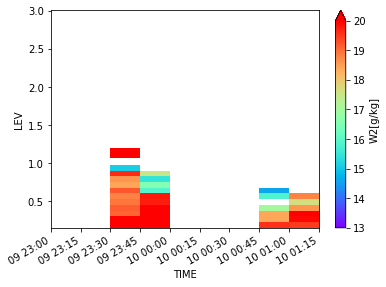

In [550]:
XR['W2[g/kg]'].sel(LEV=slice(zmin, zmax)).plot(vmin=vmin, vmax=vmax, cmap=cmap)


In [551]:
df.describe()

,W[g/kg],dW[g/kg],R355,dR355,T[K],RO[gm^-3],PZ^2_355,Wsonde[g/kg],dWsonde[g/kg],uncertainty[%],W2[g/kg]
count,6.600000e+01,2.840000e+02,1.420000e+02,2.840000e+02,284.000000,284.000000,284.000000,284.0,284.0,6.600000e+01,34.000000
mean,1.139667e+101,1.772993e+200,7.887324e+06,3.063968e+41,257.922535,0.793680,1576.108970,0.0,0.0,1.091876e+101,18.677647
std,2.765420e+101,inf,4.096527e+06,6.390848e+41,19.243070,0.243998,5326.927610,0.0,0.0,2.634943e+101,1.780809
min,3.667000e+00,-7.738000e+102,1.694000e-100,-1.290000e+03,224.400000,0.422500,0.000000,0.0,0.0,1.768817e+00,14.560000
25%,1.752750e+01,-2.497500e+11,1.000000e+07,-1.093750e+03,240.900000,0.571600,0.000000,0.0,0.0,4.699060e+00,17.830000
50%,1.968500e+01,0.000000e+00,1.000000e+07,-6.555000e+00,258.400000,0.770400,21.292280,0.0,0.0,2.550600e+01,19.000000
75%,6.982750e+01,0.000000e+00,1.000000e+07,2.468000e+41,275.900000,1.019000,64.082468,0.0,0.0,1.715663e+02,19.897500
max,1.213000e+102,1.200000e+202,1.000000e+07,2.831000e+42,286.900000,1.202000,33810.270000,0.0,0.0,1.000000e+102,21.390000
